In [1]:
from google.colab import drive
drive.mount('/content/drive') # Connecting to Google Drive

import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/My Drive/mypsycho/final_dataset.xlsx', engine = 'openpyxl')
df.head(2)

Mounted at /content/drive


,Unnamed: 0,Filename,Test_index,Presentation,Question,Amplitude,Data_STD,Amplitude_2,Data_2_STD,Class_label,...,column_231.1,column_232.1,column_233.1,column_234.1,column_235.1,column_236.1,column_237.1,column_238.1,column_239.1,column_240.1
0,0,167,2,3,7,0.532680,0.248967,0.424689,0.232337,1,...,784.0,440.0,5.0,-185.0,-239.0,-314.0,-511.0,-805.0,-1148.0,-1290.0
1,1,167,2,3,1,0.558694,0.281558,0.367752,0.226045,1,...,524.0,511.0,489.0,471.0,461.0,464.0,500.0,539.0,565.0,568.0


In [2]:
df.drop(['Filename', 'Unnamed: 0'], axis = 1, inplace = True)

In [3]:
df.shape

(29852, 490)

In [7]:
df['Test_index'].unique()

array([2, 3, 1, 0, 4, 6, 5])

In [8]:
df['Presentation'].unique()

array([3, 2, 1, 4])

In [11]:
df['Question'].unique()

array([ 7,  1, 11,  3,  0, 10,  4, 12,  8,  2,  9,  5,  6, 13])

In [ ]:
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models, layers
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df.drop('Class_label', axis = 1), df['Class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25, shuffle = False)
print(X_train.shape)
print(y_train.shape)
#Векторизация меток:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(22389, 489)
(22389,)


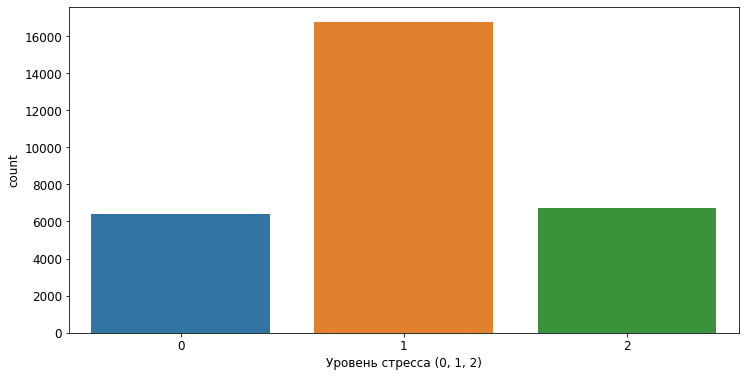

In [ ]:
# Нормализация данных в диапазоне от 0 до 1:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
'''Второй способ:
X_train = X_train.astype('float32') / 255
y_train = y_train.astype('int32')
X_test = X_test.astype('float32') / 255
y_test = y_test.astype('int32')'''
plt.figure(figsize = (12, 6));
sns.countplot(x = df['Class_label']);
plt.xlabel("Уровень стресса (0, 1, 2)")
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels

#Распределение классов:

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (489,)))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(3, activation = 'sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               250880    
                                                                 
 dense_31 (Dense)            (None, 512)               262656    
                                                                 
 dense_32 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 515,075
Trainable params: 515,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32, epochs = 20)

print('Точность на тестовом наборе: {:.2f} %'.format(model.evaluate(X_test, y_test)[1] * 100))

Epoch 1/20
700/700 [==============================] - 6s 7ms/step - loss: nan - accuracy: 0.3760
Epoch 2/20
700/700 [==============================] - 5s 8ms/step - loss: nan - accuracy: 0.2122
Epoch 3/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 4/20
700/700 [==============================] - 5s 8ms/step - loss: nan - accuracy: 0.2122
Epoch 5/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 6/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 7/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 8/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 9/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 10/20
700/700 [==============================] - 5s 7ms/step - loss: nan - accuracy: 0.2122
Epoch 11/20
700/700 [========

In [ ]:
# Сохранение архитектуры и весов модели в формате HDF5:
model.save('/content/drive/My Drive/mypsycho/model_psycho.h5')